In [20]:
import numpy as np
from sklearn.metrics import euclidean_distances
import pandas as pd
import minisom
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
from random import randint, choice
import LVQ

In [37]:
data = pd.read_csv(r"data/SD-2X_rocktype.csv")
x = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values
y[y==4] = 0
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=44)

# use Minmaxscaler because we use euclidean distance
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)

In [22]:
np.unique(y_test)

array([0, 1, 2, 3], dtype=int64)

In [23]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(x_train)
som.train_random(data = x_train, num_iteration = 100)

In [24]:
labels = np.zeros((4, 10, 10))
labels

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]

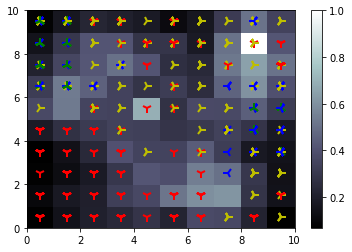

In [25]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['1', '2', '3', '4', 's', '8', 'p', '>']
colors = ['r', 'g', 'b', 'y', 'w', 'c', 'm', 'k']
for i, x in enumerate(x_train):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y_train[i]],
         markeredgecolor = colors[y_train[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
    if y_train[i] == 0:
        labels[0, w[0], w[1]] += 1
    elif y_train[i] == 1:
        labels[1, w[0], w[1]] += 1
    elif y_train[i] == 2:
        labels[2, w[0], w[1]] += 1
    elif y_train[i] == 3:
        labels[3, w[0], w[1]] += 1
show()

In [26]:
taggings = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        tmp = np.array([labels[0][i][j], labels[1][i][j], labels[2][i][j], labels[3][i][j]])
        sort = tmp.argsort()
        if (sort[3]/sort[2] < 20):
            taggings[i][j] = np.random.choice([sort[3], sort[2]])
        else:
            taggings[i][j] = sort[3]

C:\Users\Thend\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in longlong_scalars
  


In [27]:
taggings

array([[0., 0., 3., 3., 3., 2., 3., 1., 1., 3.],
       [0., 0., 0., 0., 3., 3., 2., 1., 2., 2.],
       [3., 0., 0., 3., 3., 3., 2., 2., 3., 3.],
       [3., 0., 0., 3., 3., 2., 3., 3., 3., 3.],
       [3., 0., 2., 2., 3., 0., 2., 0., 3., 3.],
       [0., 3., 3., 0., 2., 3., 3., 2., 0., 3.],
       [3., 3., 0., 3., 2., 3., 2., 2., 3., 2.],
       [3., 2., 2., 2., 2., 3., 3., 3., 2., 2.],
       [0., 3., 3., 2., 2., 1., 3., 2., 3., 3.],
       [2., 0., 2., 3., 3., 1., 2., 3., 3., 2.]])

In [28]:
mappings = som.win_map(x_train)
som.weights

array([[[0.42381993, 0.32338311, 0.3889652 , 0.4839698 , 0.57225517,
         0.05294675],
        [0.42529693, 0.3350345 , 0.42315493, 0.487437  , 0.53423472,
         0.06937399],
        [0.42549555, 0.37482164, 0.44204674, 0.49886769, 0.46908733,
         0.11893298],
        [0.42036245, 0.39660783, 0.43701992, 0.49580013, 0.45998621,
         0.13268814],
        [0.40318796, 0.39068215, 0.44052051, 0.49796223, 0.4659389 ,
         0.16025967],
        [0.3465841 , 0.37658134, 0.43672379, 0.53277597, 0.36331984,
         0.36261101],
        [0.26138541, 0.38833726, 0.22474802, 0.55977002, 0.20622799,
         0.611954  ],
        [0.19628441, 0.36896422, 0.16888049, 0.58195565, 0.11692155,
         0.66668897],
        [0.23059062, 0.43609572, 0.13234813, 0.58132201, 0.15127219,
         0.61507228],
        [0.257374  , 0.48940477, 0.09039808, 0.55645486, 0.19682323,
         0.58110962]],

       [[0.42281889, 0.34467864, 0.39249458, 0.51611016, 0.51829785,
         0.11561342

In [29]:
epsilon = 0.9
epsilon_dec_factor = 0.001

In [30]:
def find_class_id(test_vector, p_vectors):
    return find_closest(test_vector, p_vectors)[1].class_id

In [31]:
p_vectors = []
for i in range(10):
    for j in range(10):
        if(taggings[i][j] == 0):
            p = LVQ.prototype(0, som.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(taggings[i][j] == 1):
            p = LVQ.prototype(1, som.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(taggings[i][j] == 2):
            p = LVQ.prototype(2, som.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(taggings[i][j] == 3):
            p = LVQ.prototype(3, som.weights[(i,j)], epsilon)
            p_vectors.append(p)
print("class id \t Initial prototype vector \n")
for p_v in p_vectors:
    print(p_v.class_id, '\t', p_v.p_vector)

class id 	 Initial prototype vector 

0 	 [0.42381993 0.32338311 0.3889652  0.4839698  0.57225517 0.05294675]
0 	 [0.42529693 0.3350345  0.42315493 0.487437   0.53423472 0.06937399]
3 	 [0.42549555 0.37482164 0.44204674 0.49886769 0.46908733 0.11893298]
3 	 [0.42036245 0.39660783 0.43701992 0.49580013 0.45998621 0.13268814]
3 	 [0.40318796 0.39068215 0.44052051 0.49796223 0.4659389  0.16025967]
2 	 [0.3465841  0.37658134 0.43672379 0.53277597 0.36331984 0.36261101]
3 	 [0.26138541 0.38833726 0.22474802 0.55977002 0.20622799 0.611954  ]
1 	 [0.19628441 0.36896422 0.16888049 0.58195565 0.11692155 0.66668897]
1 	 [0.23059062 0.43609572 0.13234813 0.58132201 0.15127219 0.61507228]
3 	 [0.257374   0.48940477 0.09039808 0.55645486 0.19682323 0.58110962]
0 	 [0.42281889 0.34467864 0.39249458 0.51611016 0.51829785 0.11561342]
0 	 [0.43335027 0.34166166 0.44755189 0.48742451 0.50083499 0.08218157]
0 	 [0.43613567 0.36011908 0.46357642 0.4830846  0.47431463 0.08277515]
0 	 [0.42630005 0.37298152

In [32]:
lvq = LVQ.LVQ(x_train, y_train, n_classes=2, n_neurons=25, p_vectors=p_vectors, epsilon=0.9, epsilon_dec_factor=0.001)
neurons = lvq.fit(x_train, y_train)

In [33]:
predicted_y = [lvq.predict(instance) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.99      0.87      0.93       138
          1       0.96      0.78      0.86        55
          2       0.58      0.50      0.54        28
          3       0.74      0.95      0.83       108

avg / total       0.87      0.85      0.85       329



In [34]:
A = np.array(predicted_y)-y_test
len(A[A==0])/len(A)

0.851063829787234

In [38]:
data_new = pd.read_csv(r"data/SD-3X_rocktype.csv")
x_new = data.iloc[:, 0:6].values
y_new = data.iloc[:, 6].values
y_new[y_new == 4] = 0
x_new = minmax.fit_transform(x_new)
predicted_y_new = [lvq.predict(instance) for instance in x_new]

from sklearn.metrics import classification_report

print (classification_report(y_new, predicted_y_new, target_names=['0', '1', '2', '3']))

             precision    recall  f1-score   support

          0       0.99      0.83      0.90       558
          1       0.88      0.86      0.87       165
          2       0.63      0.41      0.50       139
          3       0.73      0.96      0.83       453

avg / total       0.85      0.83      0.83      1315



In [36]:
arr = np.array([1,2,3,0])

arr.argsort()

array([3, 0, 1, 2], dtype=int64)